
We usually use logistic regression to get a binary output (yes/no, win/loss type) from a linear combination of input features.

## Training

Similar to linear regression, we will use gradient descent for optimization but unlike the equation in linear regression which was $y = m.x + b$, we will use the sigmoid function to scale our output in the range of (0, 1).

The linear combination of input features, weights and biases will be the same as that in linear regression. $y = m.x + b$

now, $\hat{y} = \sigma(\lambda) = \frac{1}{1 + \exp{(-a)}}$ 

We will be using the following cost function and try to minimize it using gradient descent:

$$J(w, b) = -\frac{1}{n}\sum_1^n~[y_i~log(\hat{y_i}) + (1 - y_i)~log(1 - \hat{y_i})]$$

A detailed derivation can be found [here](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-differentiated)
<br>
computing it's derivative, we get :
$$\frac{\partial J}{\partial w_j} = \frac{1}{n}\sum_1^n [\hat{y_i} - y_i]x_i$$
$$\frac{\partial J}{\partial b_j} = \frac{1}{n}\sum_1^n [\hat{y_i} - y_i]$$



now we update the weights and bias in this way: 

$w = w - \alpha \times \frac{\partial J}{\partial w_j}$
<br>
$b = b - \alpha \times \frac{\partial J}{\partial b_j}$
<br>
here $\alpha$ is the learning rate

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [80]:
class LogisticRegression:
    def __init__(self, alpha=0.01, n_iterations=1000):
        self.alpha = alpha
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y = y.reshape(n_samples,)

        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(model)

            loss = y_predicted - y
            dE_dw = (1 / n_samples) * np.dot(X.T, loss)
            dE_db = (1 / n_samples) * np.sum(loss)

            self.weights -= self.alpha * dE_dw
            self.bias -= self.alpha * dE_db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(model)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [81]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = predictions = log_reg.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_test == y_pred)/len(y_test)

acc = accuracy(y_pred, y_test)
print("Accuracy: ", acc)

Accuracy:  0.9210526315789473


In [82]:
from sklearn.datasets import make_blobs
np.random.seed(42)
%matplotlib inline

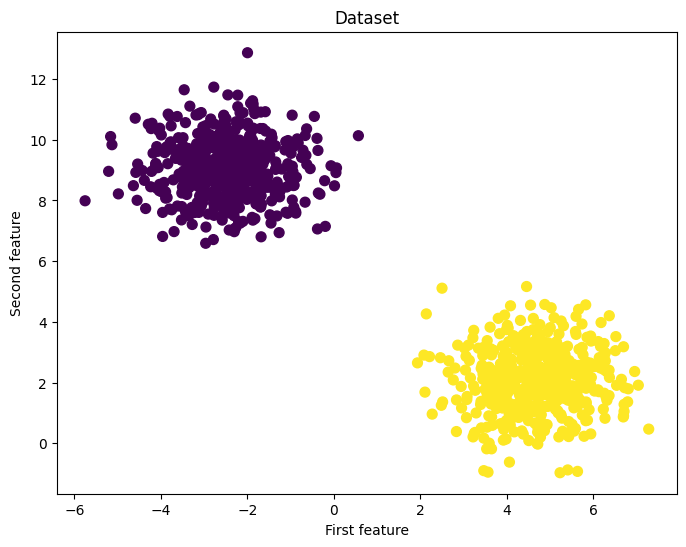

In [83]:
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], cmap='viridis', c=y_true, s=50)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [84]:
y_true = y_true[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

regressor = LogisticRegression(alpha=1, n_iterations=1000)

regressor.fit(X_train, y_train)
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 50.04302222222222%
test accuracy: 99.503872%
